# Análise de dados de atletas em uma competição

## Criação das matrzes com os dados

In [1]:
atleta<-c ("André", "Bernardo", "Carlos", "Daniel", "Eduardo", "Fernando", "Gabriel", "Hugo", "Ivan", "João", "Kleber", "Luiz", "Murilo", "Ney", "Orlando", "Paulo", "Queiroz", "Renato", "Sílvio", "Tadeu", "Ulisses", "Vinícius", "Washington", "Xavier", "Yuri", "Zózimo")
tempo<-c(37, 39, 40, 38, 35, 35, 44, 41, 39, 41, 49, 36, 47, 46, 41, 33, 42, 38, 46, 46, 37, 40, 43, 38, 38, 45)
idade<-c(22, 35, 26, 32, 24, 24, 28, 34, 28, 34, 36, 23, 31, 33, 36, 25, 29, 22, 24, 34, 25, 29, 33, 32, 27, 35)
tempoDeTreinamento<-c(6,10,9,3,11,8,14,4,7,13,2,6,3,15,3,9,3,4,13,14,9,11,12,6,5,2)

## Histogramas das variáveis numéricas

A distribuição do tempo de prova é mostrada no histograma a seguir:

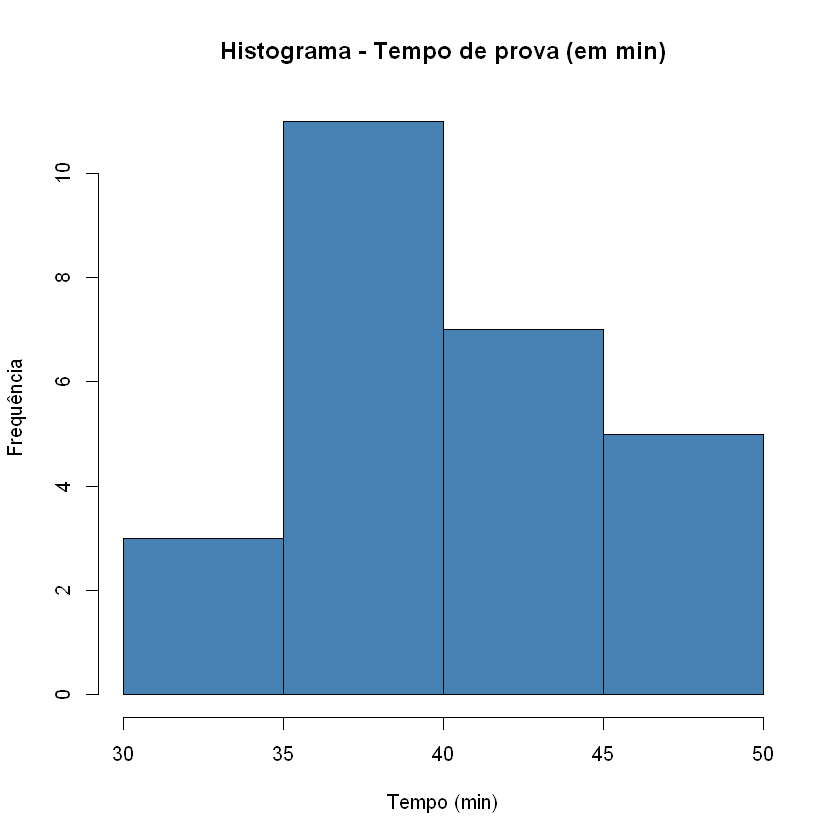

In [6]:
hist(tempo, 
     breaks = 5, 
     ylab = "Frequência", 
     xlab = "Tempo (min)", 
     main = "Histograma - Tempo de prova (em min)",
     col = "steelblue")

Por sua vez, a idade está distribuída conforme mostra o seguinte histograma:

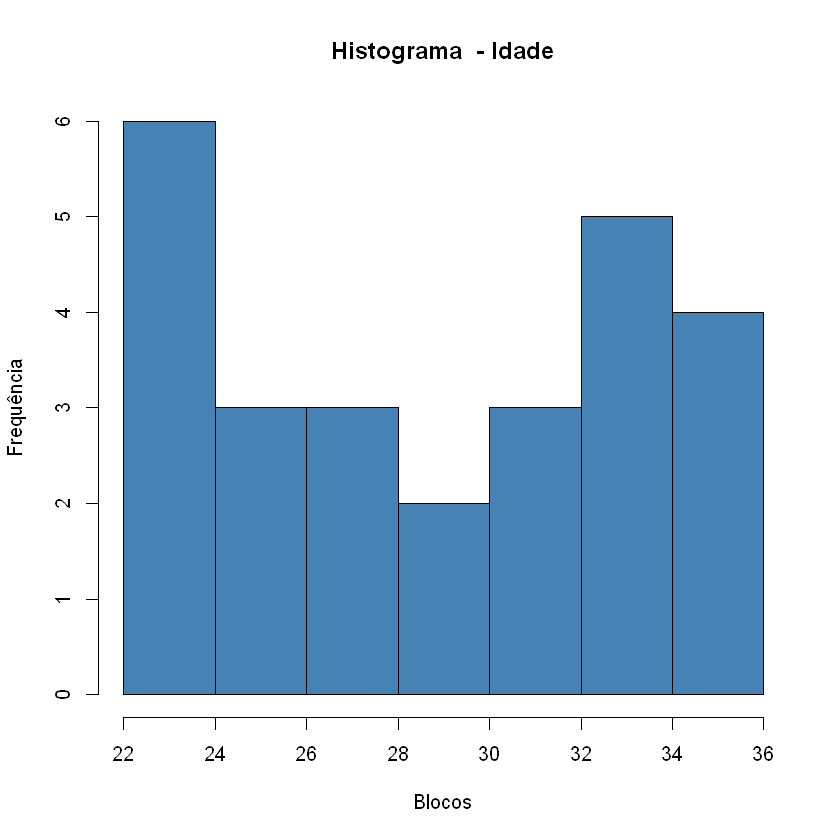

In [8]:
hist(idade, 
     breaks = 5, 
     xlab = "Blocos", 
     ylab = "Frequência", 
     main = "Histograma  - Idade", 
     col = "steelblue")

Finalmente, a distribuição do tempo de experiência dos competidores é mostrada a seguir:

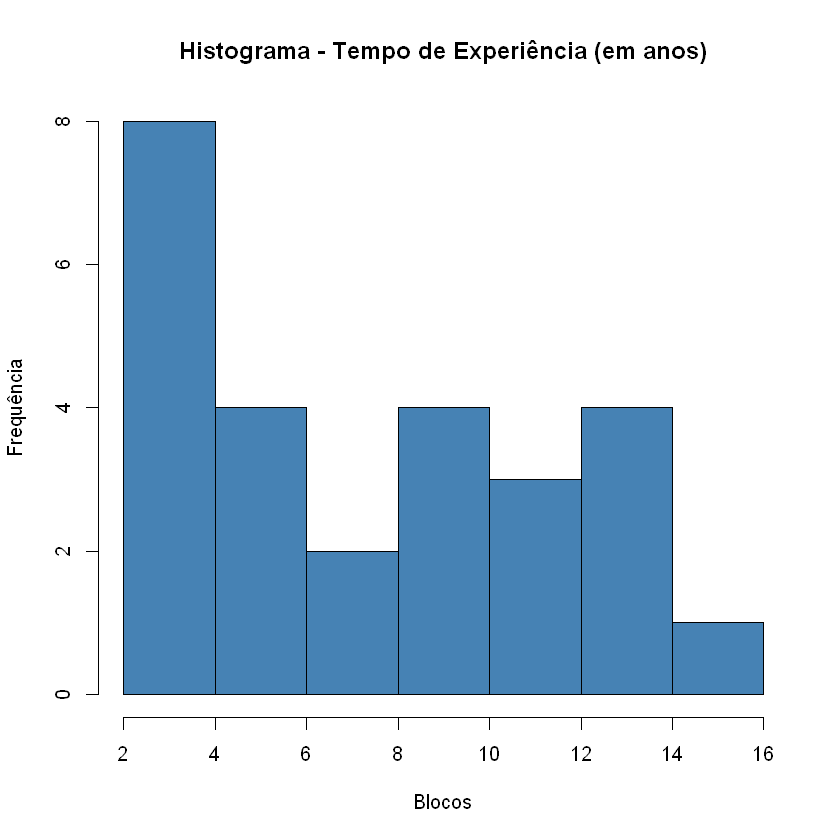

In [9]:
hist(tempoDeTreinamento, 
     breaks = 5, 
     ylab = "Frequência", 
     xlab = "Blocos", 
     main = "Histograma - Tempo de Experiência (em anos)", 
     col = "steelblue")

## Diagramas de correlação entre as variáveis

### Tempo de prova _versus_ idade

O primeiro gráfico desta seção mostra o tempo de prova em função da idade dos competidores por meio da função `plot`. Complementarmente, foi adicionada ao gráfico uma etiqueta contendo a informação da correlação entre as duas variáveis consideradas. 

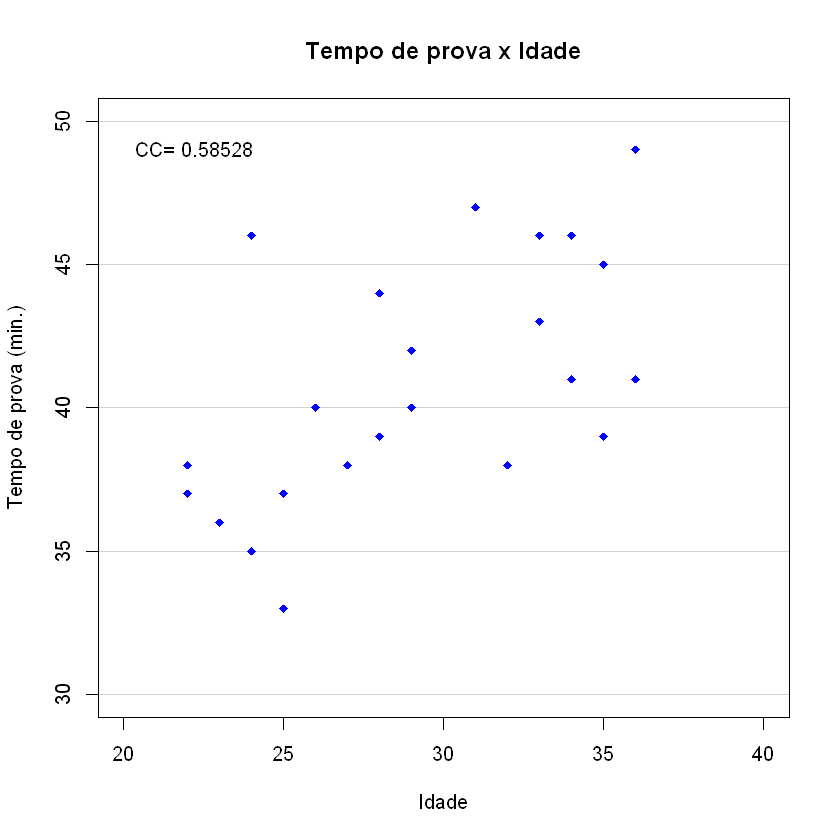

In [24]:
# Criando gráfico Idade x tempo de prova
plot(idade, tempo,
     col = "blue", 
     xlab = "Idade", ylab = "Tempo de prova (min.)",
     main = "Tempo de prova x Idade", 
     pch = 18, ylim = c(30,50), xlim = c(20, 40),
     panel.first = axis(2, at = seq(20, 40, by = 5)), grid(0, NULL, lty = 1))

# Adicionando coeficiente de correlação de idade x tempo de prova
text(20, 49, paste("CC=", toString(round(cor(tempo,idade), 5))),pos = 4)

Como se pode observar, existe uma correlação moderada entre o tempo de conclusão da prova e a idade dos participantes.

### Tempo de prova _versus_ Tempo de Treinamento

Quanto a relação entre o tempo de prova e o tempo de treinamento, o gráfico de dispersão abaixo mostra que...

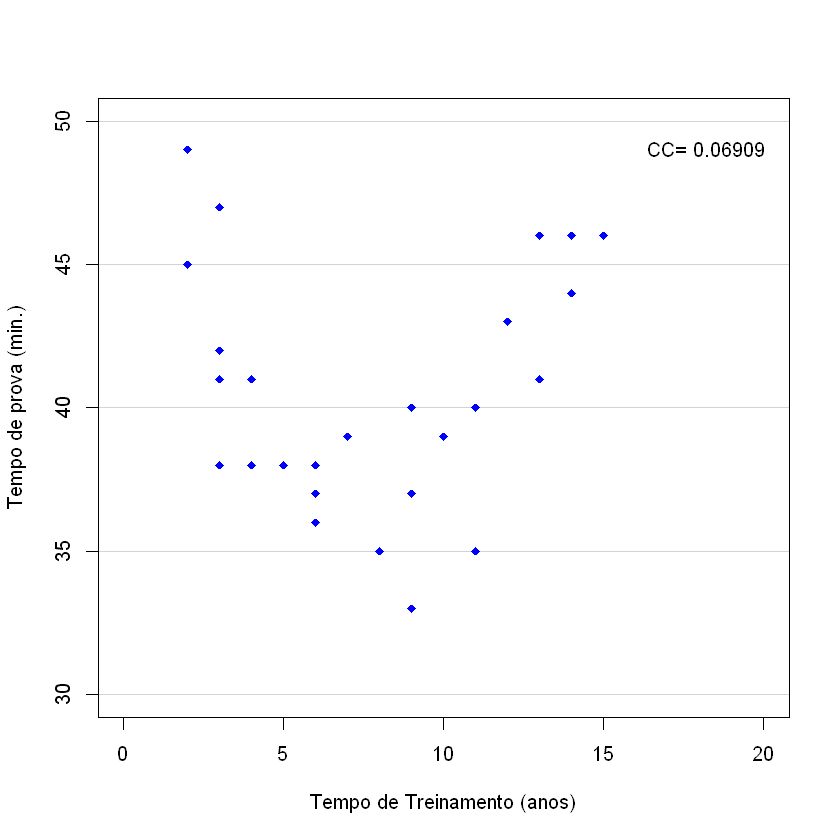

In [30]:
# Criando gráfico tempo de treinamento x tempo de prova
plot (tempoDeTreinamento, tempo, 
      col="blue", pch=18, 
      ylim = c(30,50), xlim=c(0,20), 
      xlab = "Tempo de Treinamento (anos)", ylab = "Tempo de prova (min.)", 
      panel.first = axis(2, at = seq(20, 40, by = 5)), grid(0, NULL, lty = 1))

# Adicionando coeficiente de correlação de idade x tempo de prova
text(16, 49, paste("CC=", toString(round(cor(tempo, tempoDeTreinamento), 5))),pos = 4)

Note-se que a relação entre essas duas variáveis é não linear, especificamente de tipo quadrática. Considerando essa hipótse, é realizada uma regressão quadrática:

In [31]:
#Fazendo a regressão linear
reg <- lm(formula = tempo ~tempoDeTreinamento + I(tempoDeTreinamento^2))
a1 <- coef(reg)[1]
a2 <- coef(reg)[2]
a3 <- coef(reg)[3]

O próximo passo é gerar uma função de regressão:

In [32]:
#Função gerada na regressão 
eq <- function(tempoDeTreinamento) {a3*tempoDeTreinamento^2 +a2*tempoDeTreinamento + a1}

Finalmente, adicionamos a curva de regressão quadrática ao gráfico de dispersão criado anteriormente:

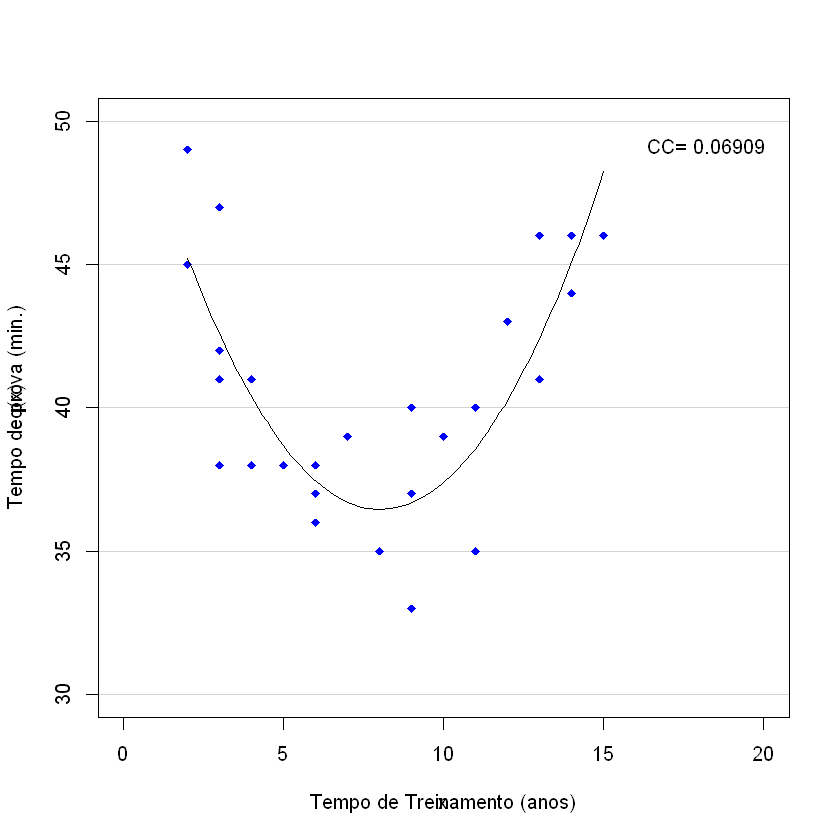

In [33]:
# Criando gráfico tempo de treinamento x tempo de prova
plot (tempoDeTreinamento, tempo, 
      col="blue", pch=18, 
      ylim = c(30,50), xlim=c(0,20), 
      xlab = "Tempo de Treinamento (anos)", ylab = "Tempo de prova (min.)", 
      panel.first = axis(2, at = seq(20, 40, by = 5)), grid(0, NULL, lty = 1))

#Adicionando a curva a partir da função gerada na regressão linear
par(new=TRUE)
curve(eq, 
      min(tempoDeTreinamento), max(tempoDeTreinamento), 
      xlim=c(0, 20), ylim=c(30, 50), axes = FALSE)

# Adicionando coeficiente de correlação de idade x tempo de prova
text(16, 49, paste("CC=", toString(round(cor(tempo, tempoDeTreinamento), 5))),pos = 4)